In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree          import DecisionTreeRegressor
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import RandomForestRegressor
from sklearn.ensemble      import ExtraTreesRegressor
from sklearn.ensemble      import AdaBoostRegressor
from sklearn.ensemble      import GradientBoostingRegressor
from xgboost               import XGBRegressor
from lightgbm              import LGBMRegressor
from catboost              import CatBoostRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


In [2]:
hip_df = pd.read_csv('final_data.csv', index_col=0)

### Columns Explanation ###

1- age: age in years

2- sex: (1 = male, 0 = female)

3- chest pain type: Value 1: typical angina | Value 2: atypical angina | Value 3: non-anginal pain | Value 4: asymptomatic 

4- resting blood pressure: in mm Hg on admission to the
hospital)

5- serum cholestoral in mg/dl

6- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7- resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy

8- max heart_rate: maximum heart rate achieved

9- angina exercise: exercise induced angina (1 = yes; 0 = no) - which is a type of chest pain caused by not enough blood going to the muscles of the heart.

10- depression exercise: ST depression induced by exercise relative to rest

11- Heart Disease: the predicted value our label

In [3]:
hip_df

,age,sex,chest pain,blood pressure,serum cholestoral,blood sugar,electrocardiographic,max heart_rate,angina exercise,depression exercise,heart disease
0,28.0,1.0,2.0,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,0.0
1,29.0,1.0,2.0,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,0.0
2,29.0,1.0,2.0,140.0,250.848708,0.0,0.0,170.0,0.0,0.0,0.0
3,30.0,0.0,1.0,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,0.0
4,31.0,0.0,2.0,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
289,52.0,1.0,4.0,160.0,331.000000,0.0,0.0,94.0,1.0,2.5,1.0
290,54.0,0.0,3.0,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,1.0
291,56.0,1.0,4.0,155.0,342.000000,1.0,0.0,150.0,1.0,3.0,1.0
292,58.0,0.0,2.0,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,1.0


<AxesSubplot:>

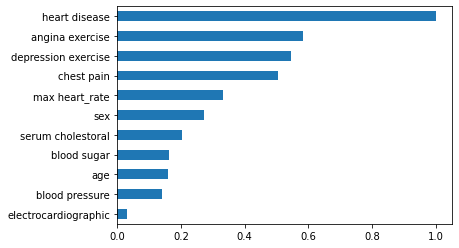

In [4]:
hip_df.corr()["heart disease"].abs().sort_values().plot.barh()

In [5]:
hip_df_new

NameError: name 'hip_df_new' is not defined

In [6]:
X = hip_df.iloc[:,:-1]
y = hip_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.2)

In [7]:
rfc = RandomForestClassifier()

In [8]:
# rfc.fit(X_train, y_train)
# (rfc.predict(X_test) == y_test).sum()/y_test.shape[0]

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88        39
         1.0       0.76      0.80      0.78        20

    accuracy                           0.85        59
   macro avg       0.83      0.84      0.83        59
weighted avg       0.85      0.85      0.85        59



In [14]:
print(confusion_matrix(pred,y_test))

[[34  5]
 [ 4 16]]


In [27]:
hip_df_new = hip_df.copy()

In [36]:
hip_df_new['exercise'] = round(hip_df_new['angina exercise']*0.55 + hip_df_new['depression exercise']*0.6)

In [37]:
X = hip_df_new.iloc[:,:-1]
y = hip_df_new.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.2)

In [38]:
hip_df_new.sample(10)

,age,sex,chest pain,blood pressure,serum cholestoral,blood sugar,electrocardiographic,max heart_rate,angina exercise,depression exercise,heart disease,exercise
223,63.0,1.0,4.0,150.0,223.0,0.00000,0.0,115.0,0.0,0.0,1.0,0.0
219,57.0,1.0,2.0,140.0,265.0,0.00000,1.0,145.0,1.0,1.0,1.0,1.0
30,39.0,0.0,3.0,110.0,182.0,0.00000,1.0,180.0,0.0,0.0,0.0,0.0
62,43.0,0.0,2.0,120.0,249.0,0.00000,1.0,176.0,0.0,0.0,0.0,0.0
129,52.0,1.0,2.0,160.0,196.0,0.00000,0.0,165.0,0.0,0.0,0.0,0.0
24,37.0,1.0,3.0,130.0,194.0,0.00000,0.0,150.0,0.0,0.0,0.0,0.0
211,49.0,1.0,4.0,130.0,206.0,0.00000,0.0,170.0,0.0,0.0,1.0,0.0
81,46.0,1.0,3.0,150.0,163.0,0.06993,0.0,116.0,0.0,0.0,0.0,0.0
164,55.0,1.0,4.0,120.0,270.0,0.00000,0.0,140.0,0.0,0.0,0.0,0.0
80,46.0,1.0,3.0,120.0,230.0,0.00000,0.0,150.0,0.0,0.0,0.0,0.0


In [39]:
rfc.fit(X_train, y_train)
pred_new = rfc.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.91        39
         1.0       0.75      0.60      0.67        20
         2.0       0.00      0.00      0.00         0

    accuracy                           0.78        59
   macro avg       0.56      0.49      0.52        59
weighted avg       0.88      0.78      0.83        59

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

## Accuracy with Data Enhancement (Aditional Column - heart_rate/age)

In [ ]:
hip_df_new = hip_df.copy()
hip_df_new['cholesteral/age'] = hip_df_new['serum cholestoral'] / hip_df_new['age']
# hip_df_new['']

In [ ]:
X = hip_df_new.drop(['heart disease'], axis=1)
y = hip_df_new['heart disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.2)

In [ ]:
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(confusion_matrix(pred,y_test))
((rfc.predict(X_test) == y_test).sum())/y_test.shape[0]

0.8305084745762712

In [ ]:
pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(pred,y_test))

[[25 15]
 [ 8 11]]


In [ ]:
hip_df_new.columns

Index(['age', 'sex', 'chest pain', 'blood pressure', 'serum cholestoral',
       'blood sugar', 'electrocardiographic', 'max heart_rate',
       'angina exercise', 'depression exercise', 'heart disease',
       'cholesteral/age'],
      dtype='object')

In [ ]:
# Adding new rows
# Francisco let results like this we can show them as success 
#  They are extra points ))
# But the problem is that the results are not good. With the data enhancement its a decrease in accuracy


In [ ]:
# My internet is so unstable I will try joining again

In [ ]:
# Adding rows
np.random.randint(2)

1

In [18]:
def data_enhancement(data):
    
    gen_data = hip_df.copy()
    
    blood_pressure_std = hip_df['blood pressure'].std()
    serum_cholestoral_std = hip_df['serum cholestoral'].std()
    heart_rate_std = hip_df['max heart_rate'].std()
    age_std = hip_df['age'].std()

    for i, d in enumerate(gen_data):
        if np.random.randint(2) == 1:
            gen_data['blood pressure'].values[i] += round(blood_pressure_std)
        else:
            gen_data['blood pressure'].values[i] -= round(blood_pressure_std)
            
        if np.random.randint(2) == 1:
            gen_data['serum cholestoral'].values[i] += round(serum_cholestoral_std)
        else:
            gen_data['serum cholestoral'].values[i] -= round(serum_cholestoral_std)
            
        if np.random.randint(2) == 1:
            gen_data['max heart_rate'].values[i] += round(heart_rate_std)
        else:
            gen_data['max heart_rate'].values[i] -= round(heart_rate_std)
            
        if np.random.randint(2) == 1:
            gen_data['age'].values[i] += round(age_std)
        else:
            gen_data['age'].values[i] -= round(age_std)
    
    return gen_data

hip_gen = data_enhancement(hip_df)
hip_gen

,age,sex,chest pain,blood pressure,serum cholestoral,blood sugar,electrocardiographic,max heart_rate,angina exercise,depression exercise,heart disease
0,36.0,1.0,2.0,148.0,67.000000,0.0,2.0,161.0,0.0,0.0,0.0
1,21.0,1.0,2.0,102.0,178.000000,0.0,0.0,184.0,0.0,0.0,0.0
2,37.0,1.0,2.0,158.0,185.848708,0.0,0.0,194.0,0.0,0.0,0.0
3,38.0,0.0,1.0,188.0,302.000000,0.0,1.0,194.0,0.0,0.0,0.0
4,23.0,0.0,2.0,118.0,284.000000,0.0,1.0,174.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
289,52.0,1.0,4.0,160.0,331.000000,0.0,0.0,94.0,1.0,2.5,1.0
290,54.0,0.0,3.0,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,1.0
291,56.0,1.0,4.0,155.0,342.000000,1.0,0.0,150.0,1.0,3.0,1.0
292,58.0,0.0,2.0,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,1.0


In [ ]:
hip_gen

,age,sex,chest pain,blood pressure,serum cholestoral,blood sugar,electrocardiographic,max heart_rate,angina exercise,depression exercise,heart disease
0,20.0,1.0,2.0,112.0,67.000000,0.0,2.0,209.0,0.0,0.0,0.0
1,21.0,1.0,2.0,102.0,308.000000,0.0,0.0,184.0,0.0,0.0,0.0
2,21.0,1.0,2.0,158.0,315.848708,0.0,0.0,146.0,0.0,0.0,0.0
3,22.0,0.0,1.0,152.0,302.000000,0.0,1.0,146.0,0.0,0.0,0.0
4,39.0,0.0,2.0,82.0,284.000000,0.0,1.0,126.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
289,52.0,1.0,4.0,160.0,331.000000,0.0,0.0,94.0,1.0,2.5,1.0
290,54.0,0.0,3.0,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,1.0
291,56.0,1.0,4.0,155.0,342.000000,1.0,0.0,150.0,1.0,3.0,1.0
292,58.0,0.0,2.0,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,1.0


In [ ]:
hip_df.values

array([[28.,  1.,  2., ...,  0.,  0.,  0.],
       [29.,  1.,  2., ...,  0.,  0.,  0.],
       [29.,  1.,  2., ...,  0.,  0.,  0.],
       ...,
       [56.,  1.,  4., ...,  1.,  3.,  1.],
       [58.,  0.,  2., ...,  1.,  1.,  1.],
       [65.,  1.,  4., ...,  1.,  1.,  1.]])

In [20]:
X = hip_df.iloc[:,:-1]
y = hip_df.iloc[:,-1]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.2,
                                    random_state=0 )

In [19]:
extra_sample = hip_gen.sample(hip_df.shape[0]//3)

In [22]:
x_train = pd.concat([X_train, extra_sample.drop(['heart disease'], axis=1 ) ])
y_train = pd.concat([y_train, extra_sample['heart disease'] ])

In [23]:
rfc = RandomForestClassifier()

In [41]:
rfc.fit(x_train, y_train)
rfc.predict(X_test)
(rfc.predict(X_test) == y_test).sum()

ValueError: Found input variables with inconsistent numbers of samples: [333, 235]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dad8d7d6-76f3-451f-977e-9da9ec3b791d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>